Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test')

In [4]:
# Verify the path of train and test
print(data_dir_train)
print(data_dir_test)

gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train
gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

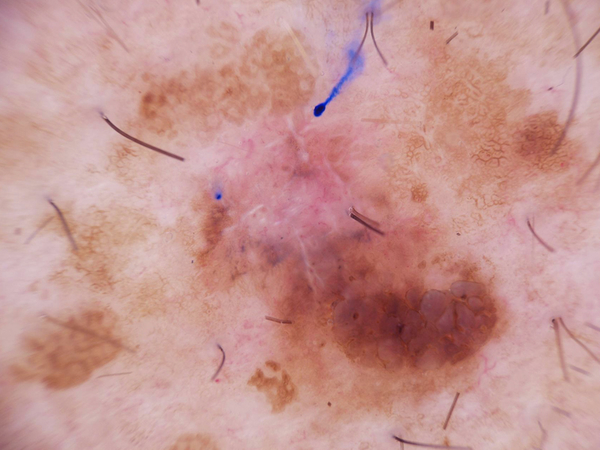

In [7]:
# Visualizing an image first, to verify
basal_cell_carcinoma = list(data_dir_train.glob('basal cell carcinoma/*'))
PIL.Image.open(str(basal_cell_carcinoma[1]))

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               validation_split=0.2, subset="training",
                                                               image_size=(img_height,img_width), seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               image_size=(img_height,img_width),
                                                               seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

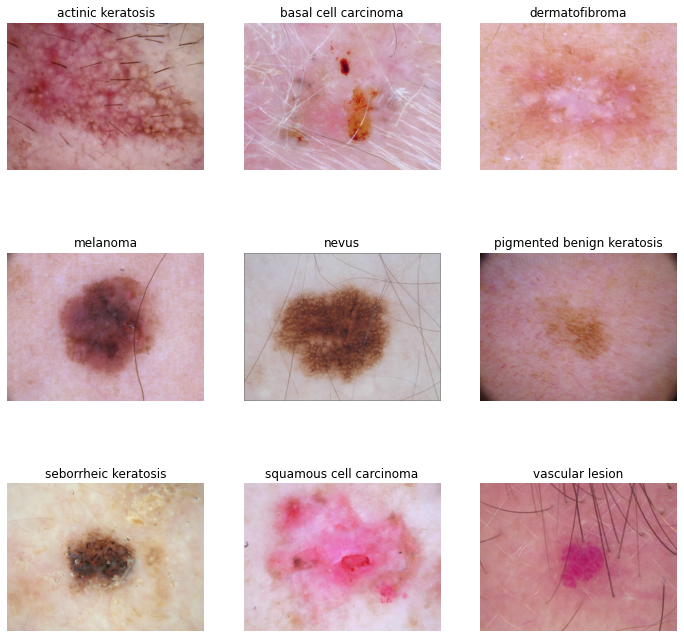

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
import matplotlib.image as mpimg


plt.figure(figsize=(12, 12))
z=1
for i in class_names:
  ax = plt.subplot(3, 3, z)
  image_list = list(data_dir_train.glob(i + '/*.jpg'))
  plt.imshow(mpimg.imread(image_list[0]))                    # Displaying one instance of all 9 classes.
  plt.title(i)
  plt.axis("off")
  z+=1

plt.show()

In [12]:
for image_batch, labels_batch in train_ds:
  print("image_batch: ", image_batch.shape)
  print("labels_batch: ", labels_batch.shape)
  break

image_batch:  (32, 180, 180, 3)
labels_batch:  (32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
# Importing required libraries

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from glob import glob
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

# Conv Layer 1
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu'))

# Conv Layer 2
model.add(Conv2D(64, kernel_size= (3, 3), activation='relu'))

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the max pooling layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Activation function layer
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [16]:
### Todo, choose an appropirate optimiser and loss function
# Optimizer: Adam
# Loss function: CrossEntropy

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 495616)            0         
                                                                 
 dense (Dense)               (None, 128)               63438976  
                                                        

### Train the model

In [18]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 [==============================] - 275s 1s/step - loss: 7.9182 - accuracy: 0.2617 - val_loss: 2.0277 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 1.8908 - accuracy: 0.3030 - val_loss: 1.7670 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 4s 75ms/step - loss: 1.5266 - accuracy: 0.4710 - val_loss: 1.5811 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 1.3890 - accuracy: 0.5301 - val_loss: 1.6834 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 1.1935 - accuracy: 0.5815 - val_loss: 1.6734 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 4s 76ms/step - loss: 1.0458 - accuracy: 0.6473 - val_loss: 1.9233 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 1.0177 - accuracy: 0.6752 - val_loss: 2.2320 - val_accuracy: 0.3893
Epoch 8/20
56

### Visualizing training results

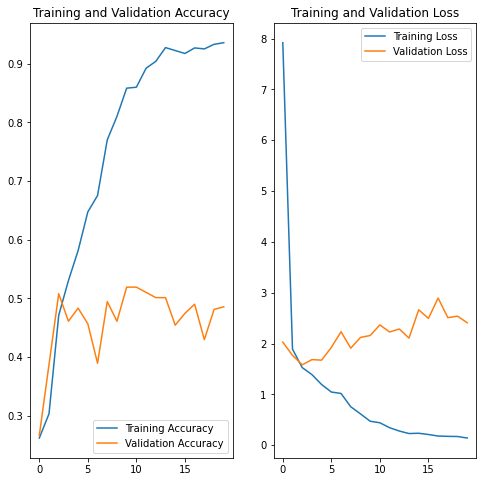

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here



> We can observe that there is a big gap in training accuracy and validation accuracy, where training accuracy >>> validation accuracy.

> This means that the model is overfitting, i.e. it is learning or mostly memorizing the training data and hence not performing on the unseen data/validation dataset.


> There are various ways to tackle overfitting like dropouts, etc. We'll be using one of them to tackle overfitting here.







In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
augmentation_strategy = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
  for i in range(9):
    augmented_img = augmentation_strategy(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# Pipelining the model
model = Sequential([
  augmentation_strategy,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [23]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
%%time
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20)

Epoch 1/20
56/56 [==============================] - 4s 31ms/step - loss: 2.0939 - accuracy: 0.2026 - val_loss: 1.9875 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 1.8986 - accuracy: 0.3186 - val_loss: 1.9290 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6821 - accuracy: 0.3828 - val_loss: 1.6595 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 2s 27ms/step - loss: 1.5429 - accuracy: 0.4403 - val_loss: 1.6615 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.5318 - accuracy: 0.4626 - val_loss: 1.3954 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4034 - accuracy: 0.4989 - val_loss: 1.3543 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3707 - accuracy: 0.5061 - val_loss: 1.3814 - val_accuracy: 0.5078
Epoch 8/20
56

### Visualizing the results

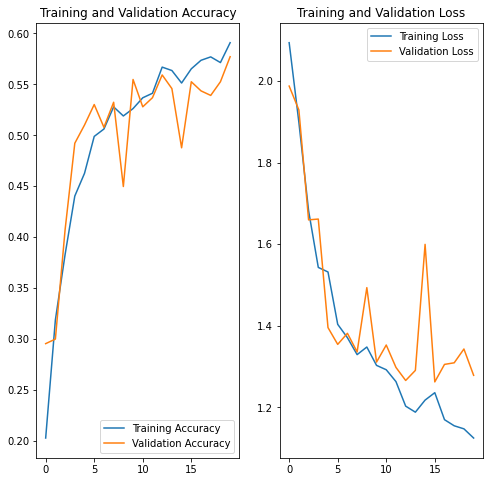

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



> We can clearly see the difference from the first model made and the new model. The model is not overfitting as we used augmentation to increase number of images.


> Although the accuracy is not high enough but there is a gap of just 1-2% in between training and validation accuracy.





#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
for i in class_names:
  sample_count = len(list(data_dir_train.glob(i + '/*.jpg')))
  print(str(i) + " - " + str(sample_count) + " samples.")

actinic keratosis - 114 samples.
basal cell carcinoma - 376 samples.
dermatofibroma - 95 samples.
melanoma - 438 samples.
nevus - 357 samples.
pigmented benign keratosis - 462 samples.
seborrheic keratosis - 77 samples.
squamous cell carcinoma - 181 samples.
vascular lesion - 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? `seborrheic keratosis`
#### - Which classes dominate the data in terms proportionate number of samples? `pigmented benign keratosis`, `melanoma`, `basal cell carcinoma`


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62E2D00950>: 100%|██████████| 500/500 [00:21<00:00, 23.19 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62E4CCC090>: 100%|██████████| 500/500 [00:23<00:00, 21.39 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F62E4C6C050>: 100%|██████████| 500/500 [00:23<00:00, 21.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F62FA1E6090>: 100%|██████████| 500/500 [01:40<00:00,  4.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F62E4C9F1D0>: 100%|██████████| 500/500 [01:27<00:00,  5.74 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62FA11AE90>: 100%|██████████| 500/500 [00:19<00:00, 25.76 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F62E4F59F90>: 100%|██████████| 500/500 [00:45<00:00, 10.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62E4CE03D0>: 100%|██████████| 500/500 [00:18<00:00, 26.41 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62E4CE0BD0>: 100%|██████████| 500/500 [00:20<00:00, 24.51 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_eb1c808c-1647-43e8-b422-ef74aab0b67f.jpg',
 'gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026626.jpg_f9716a61-9115-4f9a-8b54-50ccaa38a9f5.jpg',
 'gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_efe69b74-a3b7-4bf3-9af9-e75b460e0af5.jpg',
 'gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029915.jpg_507783c1-9c4e-431c-bba8-2de0d4c8dd93.jpg',
 'gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_orig

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.shape

(4500, 2)

In [35]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [39]:
## your code goes here
## Adding Batch Normalization and dropouts to the model

model = Sequential([
  augmentation_strategy,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.BatchNormalization(),

  # Conv Layer 1
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # Conv Layer 2
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # Conv Layer 3
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # Conv Layer 4
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # Conv Layer 5
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # Fully Connected Layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/50
169/169 [==============================] - 50s 277ms/step - loss: 2.2904 - accuracy: 0.2567 - val_loss: 2.5366 - val_accuracy: 0.1767
Epoch 2/50
169/169 [==============================] - 34s 195ms/step - loss: 1.7694 - accuracy: 0.3301 - val_loss: 2.0416 - val_accuracy: 0.2249
Epoch 3/50
169/169 [==============================] - 35s 201ms/step - loss: 1.6821 - accuracy: 0.3505 - val_loss: 1.7644 - val_accuracy: 0.3660
Epoch 4/50
169/169 [==============================] - 33s 191ms/step - loss: 1.6685 - accuracy: 0.3507 - val_loss: 1.7090 - val_accuracy: 0.4053
Epoch 5/50
169/169 [==============================] - 33s 192ms/step - loss: 1.5923 - accuracy: 0.3698 - val_loss: 1.4420 - val_accuracy: 0.4165
Epoch 6/50
169/169 [==============================] - 33s 190ms/step - loss: 1.5877 - accuracy: 0.3746 - val_loss: 1.5299 - val_accuracy: 0.3957
Epoch 7/50
169/169 [==============================] - 33s 190ms/step - loss: 1.5414 - accuracy: 0.3884 - val_loss: 1.4732 - val_ac

#### **Todo:**  Visualize the model results

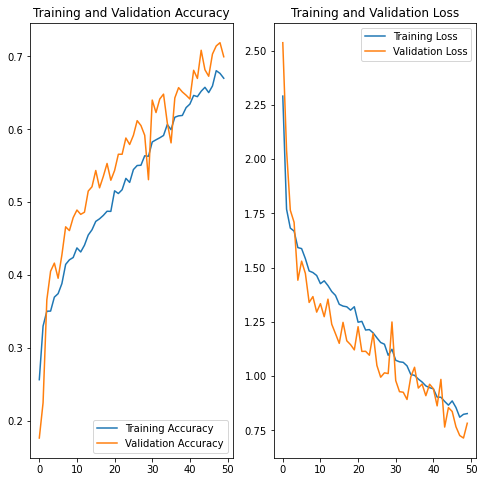

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



> we're able to get better results than before with train and validation loss not having much difference and performing better than the other model(s).


> Also, rebalancing certainly helped since now the model is not overfitting because it has enough data to train on.


> Although the accuracy is not much but it is pretty decent given the data and methodologies.





